In [117]:
#test what the format of the chandra region files are

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
import numpy as np
from astropy.io import fits
from astropy.utils.data import download_file
import astropy.units as u
from astropy import wcs
from matplotlib.patches import Ellipse
import pandas as pd
from astropy.nddata import Cutout2D



chan_ex=fits.open('/home/jacoblevine7/AGN_proj/agn_storage/chan_pix/chan_pix_good/acisfJ1236516p621303_001N026_r0152b_regimg3.fits')

Filename: /home/jacoblevine7/AGN_proj/agn_storage/chan_pix/chan_pix_good/acisfJ1236516p621303_001N026_r0152b_regimg3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     622   (74, 75)   float64   
  1  MASK          1 ImageHDU        55   (74, 75)   uint8   
  2  GTI           3 BinTableHDU     33   43R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     33   28R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     33   37R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     33   37R x 2C   [1D, 1D]   


None
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   74 / length of data axis                            
NAXIS2  =                   75 / length of data axis                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HDUNAME = 'EVENTS_IMAGE'       / ASCDM block name                               
THRFILE = 'acisD1996-11-01evtspltN0002.fits'                                    
ORIGIN  = 'ASC     '           / Source of FITS file                            
CREATOR = 'cxc - Version CAT4.3' / tool that created this output                
STK_XFM = 'pcadf03293_0

Set MJD-END to 52236.072894 from DATE-END'. [astropy.wcs.wcs]


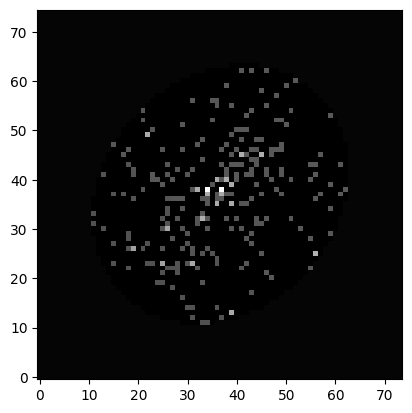

In [118]:
print(chan_ex.info())

chan_data=chan_ex[0].data
chan_wcs=wcs.WCS(chan_ex[0].header)
plt.imshow(chan_data, origin='lower', cmap='gray')

print(repr(chan_ex[0].header))

print(chan_wcs)


In [121]:
hdulst=fits.open('/home/jacoblevine7/AGN_proj/agn_storage/spec_fits/Par050_speccat.fits')
tabhdu=hdulst[1]
jw_table=tabhdu.data

pic_hdulst=fits.open('/home/jacoblevine7/AGN_proj/agn_storage/big_pix/Par050_comb_drz_sci.fits')
pic_header=pic_hdulst[0].header
print(pic_header)
#            #get the wcs from the header

jw_wcs=wcs.WCS(pic_header)
data=pic_hdulst[0].data
            
im_scale=np.abs(pic_header['CD1_1']) #degrees per pixel

cscobj_table=pd.read_csv('/home/jacoblevine7/AGN_proj/agn_git/csc_table.csv', sep=',')

source=cscobj_table[cscobj_table['chan_filename']=='acisfJ1206160m084601_001N026_r0052b_regimg3.fits']
source_coords=coord.SkyCoord(ra=source['ra'], dec=source['dec'], unit=(u.deg, u.deg))

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 6272                                                  NAXIS2  =                 6301                                                  DATE    = '2024-02-09'         / date this file was written (yyyy-mm-dd)        FILENAME= 'jw01571-f200w_drz_sci.fits' / Name of the file                       SDP_VER = '2023_3b '           / Data processing (DP) Software Version          PRD_VER = 'PRDOPSSOC-064'      / S&OC Project Reference Database (PRD) Version  OSS_VER = '9.1     '           / Observatory Scheduling Software (OSS) Version  GSC_VER = 'GSC2431 '           / Guide Star Catalog (GSC) Version               CAL_VER = '1.12.5  '           / Calibration Software Version                   CAL_VCS = 'RELEASE '           / Calibra

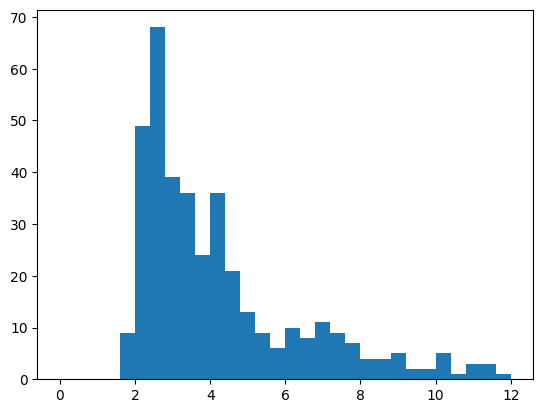

In [138]:
significance=cscobj_table['significance']

plt.hist(significance, bins=30,range=(0,12))
plt.show()


In [122]:
center=source_coords
size=(source['error_ellipse_r0'].item()*3*u.arcsec)
print(center)

cutout=Cutout2D(data,position=center,size=size,wcs=jw_wcs)



<SkyCoord (ICRS): (ra, dec) in deg
    [(189.18801296, 62.05239622)]>


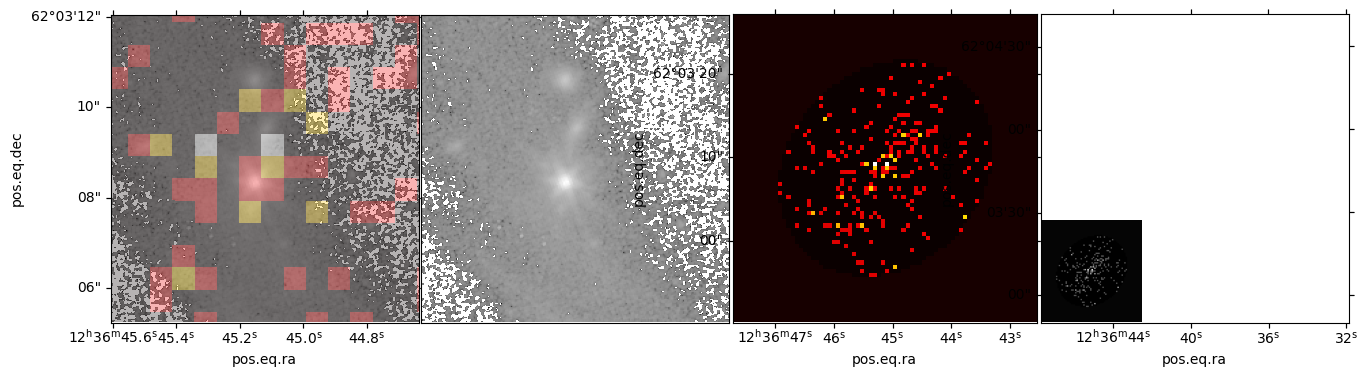

In [136]:
#make 3 4x4 plots next to each other in one figure, each with its own axes object



fig=plt.figure(figsize=(16,4))

gs=fig.add_gridspec(1,4,hspace=0,wspace=0)
ax1 = fig.add_subplot(gs[0, 0], projection=cutout.wcs)  # Top-left
ax2 = fig.add_subplot(gs[0, 1], projection=cutout.wcs)  # Top-right
ax3 = fig.add_subplot(gs[0, 2], projection=chan_wcs)
ax4 = fig.add_subplot(gs[0, 3], projection=chan_wcs)   # Bottom (spanning both columns)

ax2.tick_params(axis='x',top=False, left=False, right=False,labelleft=False,labelbottom=False)
#ax3.tick_params(axis='x',top=False, right=False, labelleft =False, labelbottom=False)
ax2.tick_params(axis='y',top=False, left=False, right=False,labelleft=False,labelbottom=False)
#ax3.tick_params(axis='y',top=False, right=False, labelleft =False, labelbottom=False)


ax1.set_xlim(0, cutout.data.shape[1])
ax1.set_ylim(0, cutout.data.shape[0])


ax1.imshow(cutout.data,origin='lower',cmap='gray',norm=mpl.colors.LogNorm())
ax1.imshow(chan_data,origin='lower', cmap='hot',transform=ax1.get_transform(chan_wcs), alpha=0.3)


ax2.imshow(cutout.data,origin='lower',cmap='gray',norm=mpl.colors.LogNorm())

ax3.imshow(chan_data,origin='lower', cmap='hot')

ax4.imshow(chan_data,origin='lower', cmap='gray')
ax4.contour(cutout.data,transform=ax4.get_transform(cutout.wcs), levels=[10], cmap='rainbow', linewidths=1)


#plt.tight_layout()
plt.show()
